<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_2_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2025-11-19 12:14:19.465016+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / BSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>

or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load BSE Data in CSV format

In [2]:
import pandas as pd
pd.to_datetime('today').strftime('%d %B %Y')

'19 November 2025'

In [3]:
!wget -q -O bharti.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/532454-AIRTEL-BSE-1Y.csv
!wget -q -O hulv.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500696-HULV-BSE-1Y.csv
!wget -q -O lnto.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500510-LNT-BSE-1Y.csv
!wget -q -O hdfc.csv https://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500180-HDFC-BSE-1Y.csv

In [4]:
dfchk = pd.read_csv('bharti.csv', delimiter =',')
dfchk.head(3)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,27-October-2025,2038.70,2093.85,2032.00,2081.05,2080.961817,1418303,12664,2.951434e+09,1314003.0,92.65,61.85,42.35
1,24-October-2025,2005.40,2033.00,2005.40,2029.10,2024.468570,56173,8378,1.137205e+08,19177.0,34.14,27.60,23.70
2,23-October-2025,2069.25,2069.25,2003.25,2008.35,2020.613866,871617,20368,1.761201e+09,531003.0,60.92,66.00,-60.90


In [5]:
#df = pd.read_csv('bharti.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.sort_values('Date', axis = 0, inplace = True)
#df.set_index('Date',inplace=True)
#df

In [6]:
def BSEcsv2df(fileName):
    df = pd.read_csv(fileName, delimiter =',')
    df['Date'] = pd.to_datetime(df['Date'])
    dropColumns = [ 'WAP',  'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open']
    df.drop(dropColumns, axis =1, inplace = True)
    df = df.rename(columns ={'Open Price':'Open','High Price':'High', 'Low Price':'Low','Close Price':'Close','Total Turnover (Rs.)':'Turnover'})
    #df = df.loc[::-1]                                                # clever way to reverse the order of rows, however we are using the sort
    df.sort_values('Date', axis = 0, inplace = True)
    df.set_index('Date',inplace=True)
    return df

In [7]:
df= BSEcsv2df('bharti.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,1652.10,1677.40,1645.9,1663.65,42088,4193,69996053.0
2024-10-29,1657.75,1668.65,1610.0,1636.85,169432,9471,276532754.0
2024-10-30,1634.95,1651.50,1618.0,1633.60,102780,5362,167984500.0
2024-10-31,1636.00,1637.00,1602.3,1611.65,352874,17666,569728756.0
2024-11-01,1642.90,1642.90,1611.0,1616.45,11695,1394,18936878.0


#Basic Charts

In [8]:
#!wget -O lnto.csv http://raw.githubusercontent.com/Praxis-QR/FDS/refs/heads/main/data/fintech/500510-LNT-BSE-1Y.csv

In [9]:
#!cat lnto.csv

## One Company

In [10]:
dfBharti = BSEcsv2df('bharti.csv')
dfBharti.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,1652.10,1677.40,1645.9,1663.65,42088,4193,69996053.0
2024-10-29,1657.75,1668.65,1610.0,1636.85,169432,9471,276532754.0
2024-10-30,1634.95,1651.50,1618.0,1633.60,102780,5362,167984500.0
2024-10-31,1636.00,1637.00,1602.3,1611.65,352874,17666,569728756.0
2024-11-01,1642.90,1642.90,1611.0,1616.45,11695,1394,18936878.0


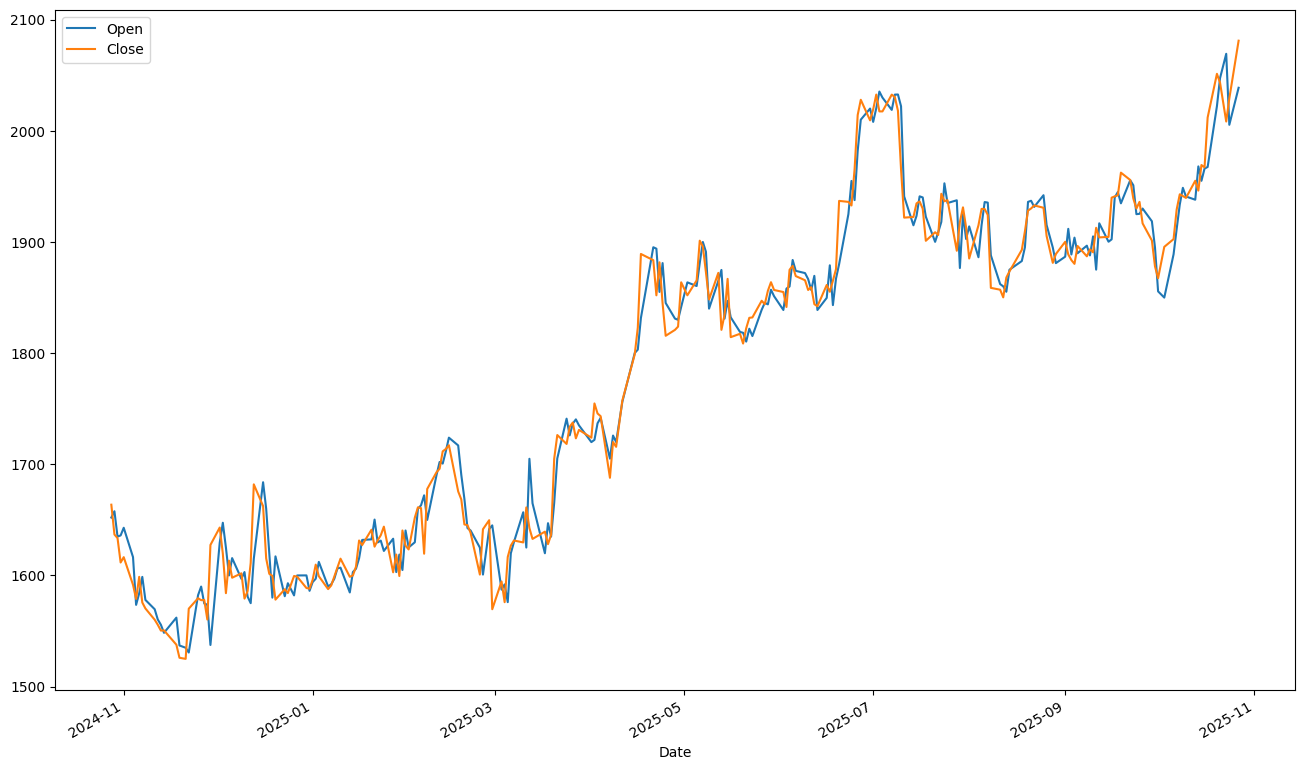

In [11]:
dfBharti.plot(y = ['Open','Close'],figsize = (16,10));

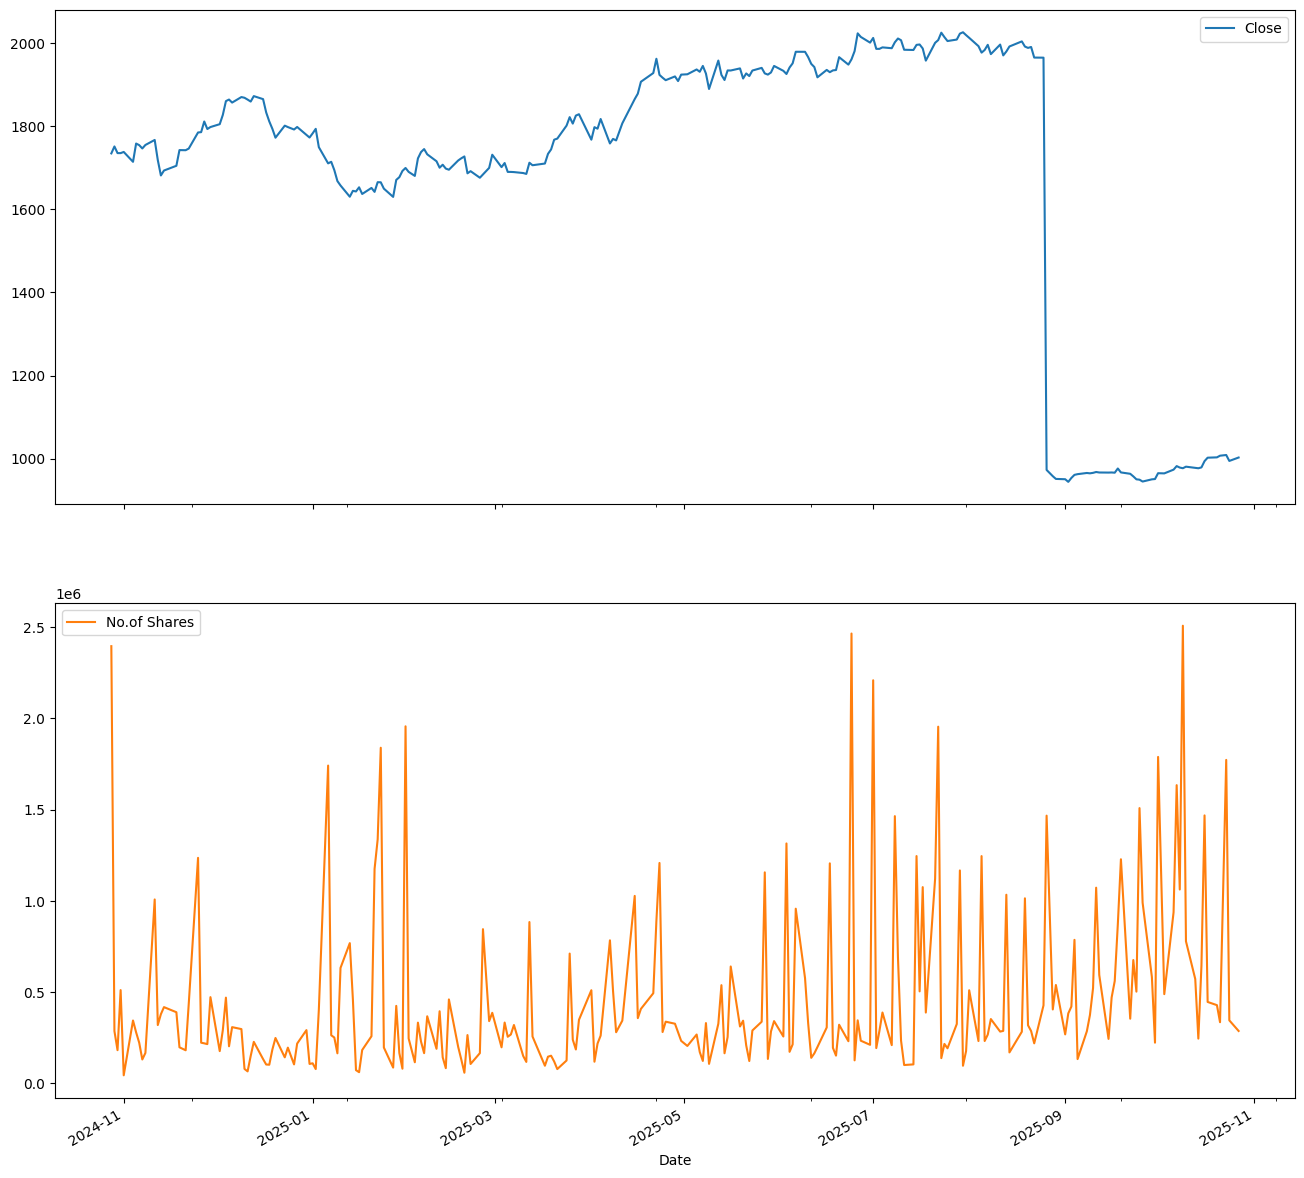

In [12]:
dfhdfc = BSEcsv2df('hdfc.csv')
dfhdfc.plot(y = ['Close','No.of Shares'],figsize = (16,16), subplots=True);

In [13]:
print(list(dfBharti.columns))

['Open', 'High', 'Low', 'Close', 'No.of Shares', 'No. of Trades', 'Turnover']


##Compare Two Companies

In [14]:
dfbharti = BSEcsv2df('bharti.csv')
dfbharti.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,1652.10,1677.40,1645.9,1663.65,42088,4193,69996053.0
2024-10-29,1657.75,1668.65,1610.0,1636.85,169432,9471,276532754.0


In [15]:
dfHUL = BSEcsv2df('hulv.csv')
dfHUL.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,2547.95,2589.20,2521.60,2575.25,31665,3009,81125068.0
2024-10-29,2589.95,2589.95,2536.25,2549.20,54929,2822,140133044.0


In [16]:
df2Com = pd.merge(dfBharti[['Close']],dfHUL[['Close']],on='Date')
df2Com.head(2)

,Close_x,Close_y
Date,,
2024-10-28,1663.65,2575.25
2024-10-29,1636.85,2549.20


In [17]:
df2Com = df2Com.rename(columns ={'Close_x':'ARTL','Close_y':'HUL'})
df2Com.head(2)

,ARTL,HUL
Date,,
2024-10-28,1663.65,2575.25
2024-10-29,1636.85,2549.20


In [18]:
startDate = pd.to_datetime(df2Com.index[0]).strftime('%d/%m/%Y')
endDate = pd.to_datetime(df2Com.index[-1]).strftime('%d/%m/%Y')
print(startDate, endDate)

28/10/2024 27/10/2025


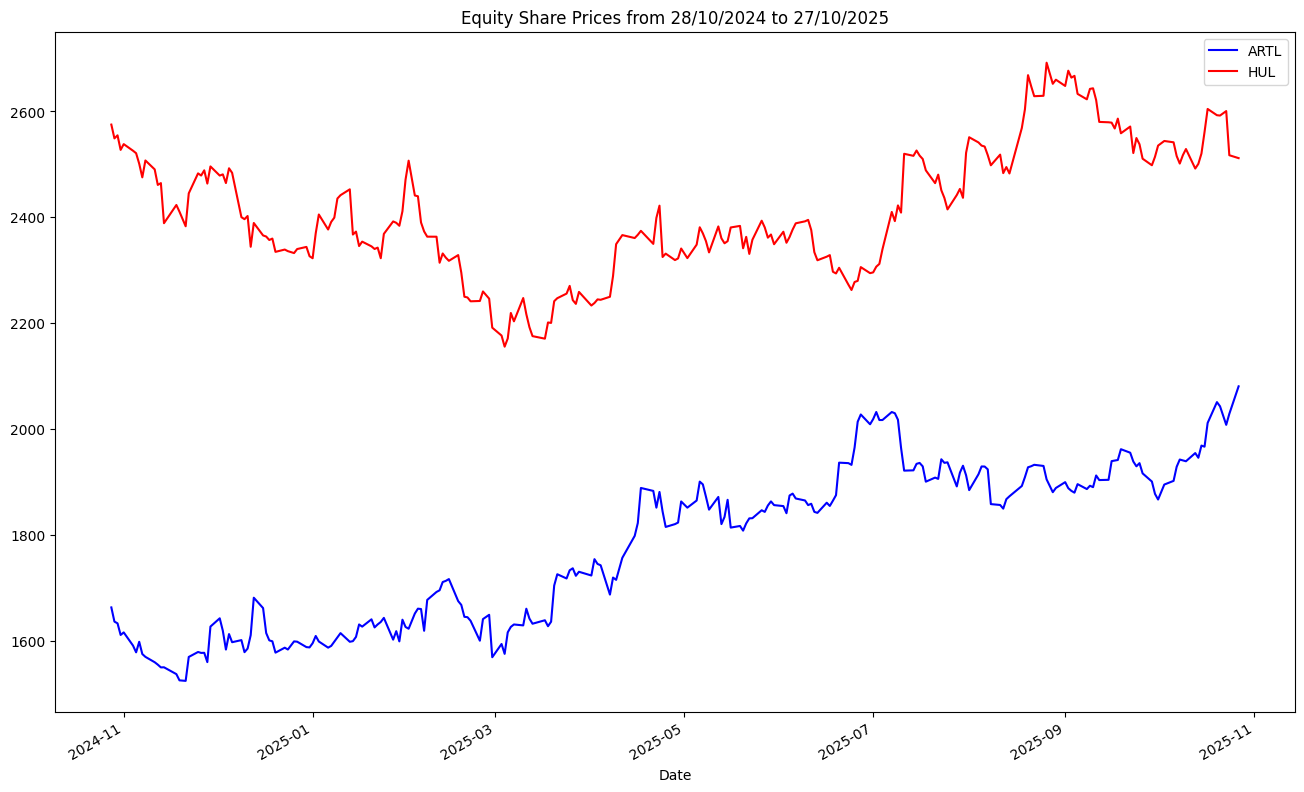

In [19]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df2Com.plot(y =['ARTL', 'HUL'], kind='line', color=['blue','red'], figsize=(16,10), title=plotTitle );



##Compare Three Companies

In [20]:
dfLNTO = BSEcsv2df('lnto.csv')
dfLNTO.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,3326.0,3372.10,3262.95,3340.1,96112,11968,319047873.0
2024-10-29,3329.8,3384.45,3320.00,3380.9,56204,4682,188977169.0


In [21]:
df3Com = pd.merge(df2Com[['ARTL','HUL']],dfLNTO[['Close']],on='Date')
df3Com.head(2)

,ARTL,HUL,Close
Date,,,
2024-10-28,1663.65,2575.25,3340.1
2024-10-29,1636.85,2549.20,3380.9


In [22]:
df3Com = df3Com.rename(columns ={'Close':'L&T'})
df3Com.head(2)

,ARTL,HUL,L&T
Date,,,
2024-10-28,1663.65,2575.25,3340.1
2024-10-29,1636.85,2549.20,3380.9


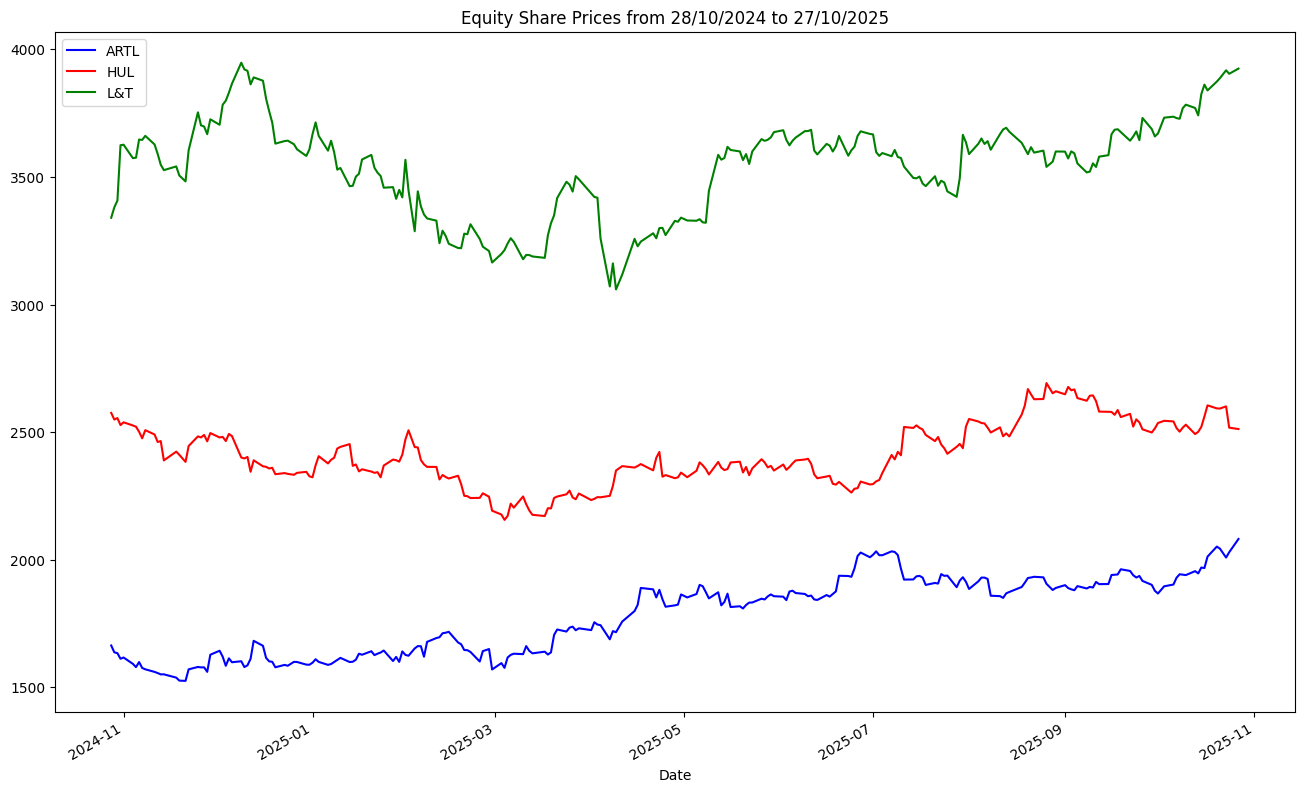

In [23]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Equity Share Prices from '+ startDate+ ' to '+endDate
df3Com.plot(y=['ARTL', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);


#Scaling the Data

In [24]:
df = df3Com.copy()
df.head()

,ARTL,HUL,L&T
Date,,,
2024-10-28,1663.65,2575.25,3340.1
2024-10-29,1636.85,2549.20,3380.9
2024-10-30,1633.60,2554.95,3407.1
2024-10-31,1611.65,2527.50,3624.4
2024-11-01,1616.45,2538.35,3626.3


In [25]:
df['ARTL'] = df['ARTL']/df['ARTL'].iloc[0]
df['HUL'] = df['HUL']/df['HUL'].iloc[0]
df['L&T'] = df['L&T']/df['L&T'].iloc[0]
df.head(10)

,ARTL,HUL,L&T
Date,,,
2024-10-28,1.000000,1.000000,1.000000
2024-10-29,0.983891,0.989884,1.012215
2024-10-30,0.981937,0.992117,1.020059
2024-10-31,0.968743,0.981458,1.085117
2024-11-01,0.971629,0.985671,1.085686
2024-11-04,0.956692,0.980837,1.069908
2024-11-05,0.949028,0.979012,1.070447
2024-11-06,0.960989,0.971304,1.091779
2024-11-07,0.947104,0.961305,1.091330


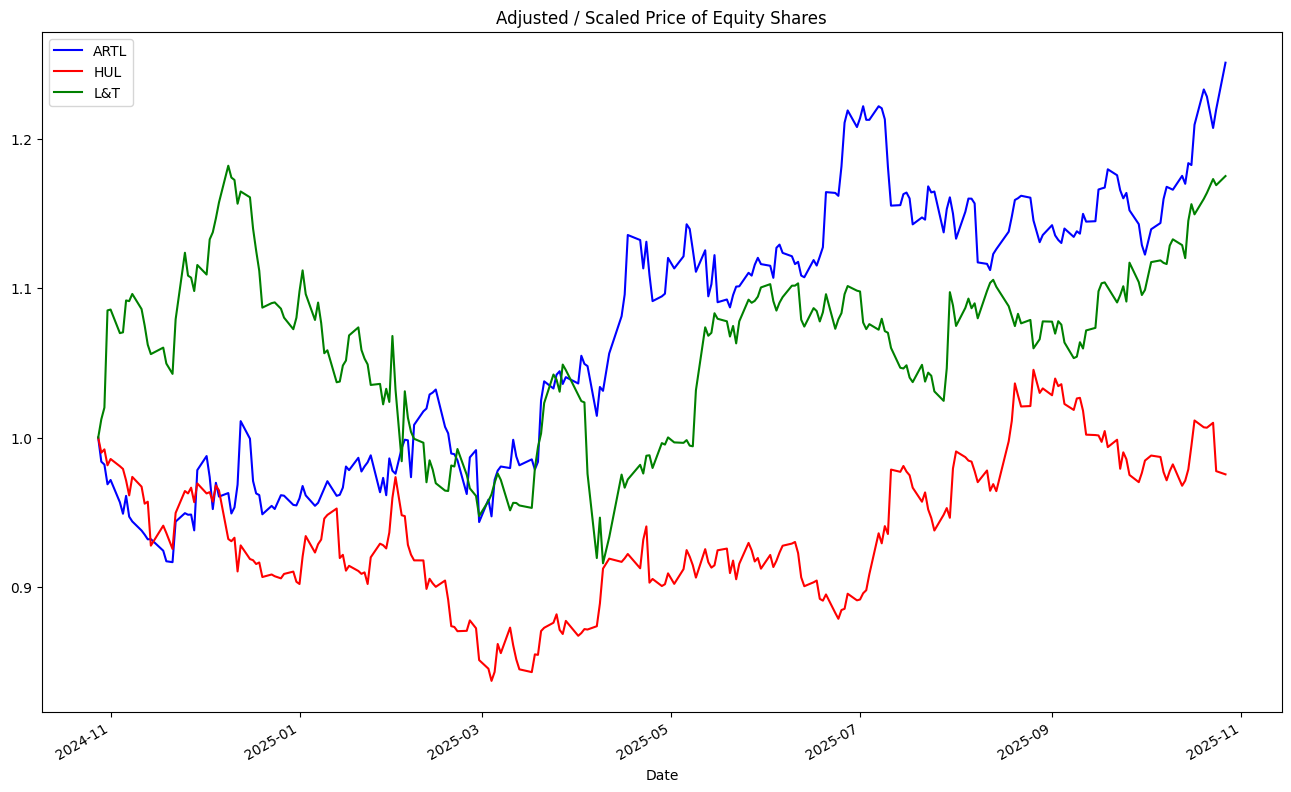

In [26]:
# Plotting directly from DataFrames with Pandas
plotTitle = 'Adjusted / Scaled Price of Equity Shares'
df.plot(y=['ARTL', 'HUL', 'L&T'], kind='line', color=['blue','red', 'green'], figsize=(16,10), title=plotTitle);

#Simple Moving Average

In [27]:
df = BSEcsv2df('bharti.csv')
df.head(2)

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,1652.10,1677.40,1645.9,1663.65,42088,4193,69996053.0
2024-10-29,1657.75,1668.65,1610.0,1636.85,169432,9471,276532754.0


In [28]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-28,1652.10,1677.40,1645.9,1663.65,42088
2024-10-29,1657.75,1668.65,1610.0,1636.85,169432
2024-10-30,1634.95,1651.50,1618.0,1633.60,102780


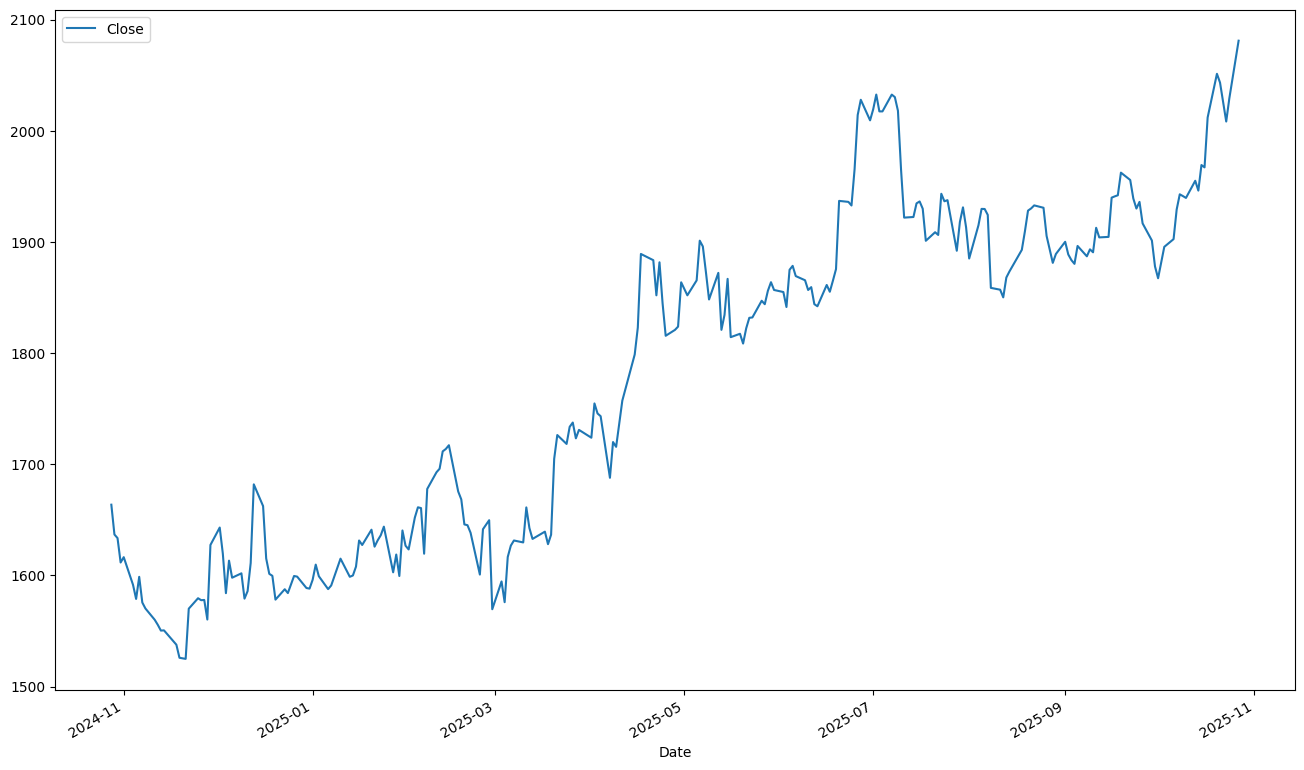

In [29]:
df.plot(y='Close', figsize=(16,10));



In [30]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

,0
Open,248
High,248
Low,248
Close,248
Volume,248
SMA10,239
SMA30,219


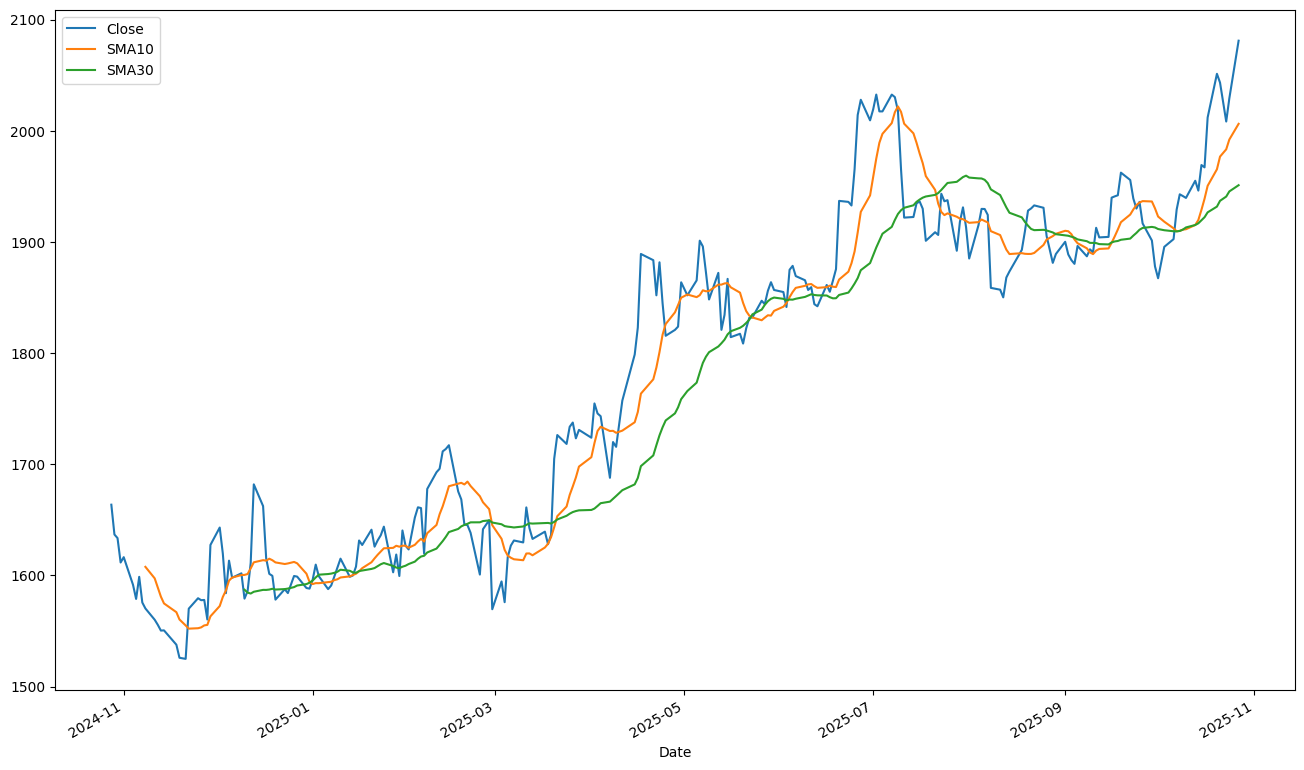

In [31]:
df.plot(y=['Close','SMA10','SMA30'], figsize=(16,10));



#Bollinger Bands
https://www.investopedia.com/terms/b/bollingerbands.asp

In [32]:
df = BSEcsv2df('hulv.csv')[['Open','High','Low','Close', 'No.of Shares']]
df = df.rename(columns ={'No.of Shares':'Volume'})
df.sample(5)

,Open,High,Low,Close,Volume
Date,,,,,
2025-02-20,2254.55,2256.70,2228.00,2248.85,18644
2025-04-28,2340.00,2349.00,2315.10,2319.45,60213
2025-10-27,2517.40,2524.10,2506.00,2511.90,120910
2025-09-24,2518.15,2575.75,2509.65,2549.85,136187
2025-02-04,2464.10,2464.10,2403.00,2439.90,120825


In [33]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2025-06-02,2342.25,2383.90,2342.25,2372.95,43839,2366.37,2363.15,15.44,2394.03,2332.27
2025-03-06,2177.00,2229.40,2164.15,2219.55,126319,2204.37,2272.70,68.20,2409.10,2136.30
2025-02-27,2272.00,2272.00,2233.55,2246.60,38133,2250.72,2339.93,81.53,2502.99,2176.87
2024-11-21,2419.95,2419.95,2377.00,2383.25,43483,2393.40,NaN,NaN,NaN,NaN
2024-12-06,2504.70,2504.70,2476.00,2484.15,116520,2488.28,2464.18,32.43,2529.04,2399.32


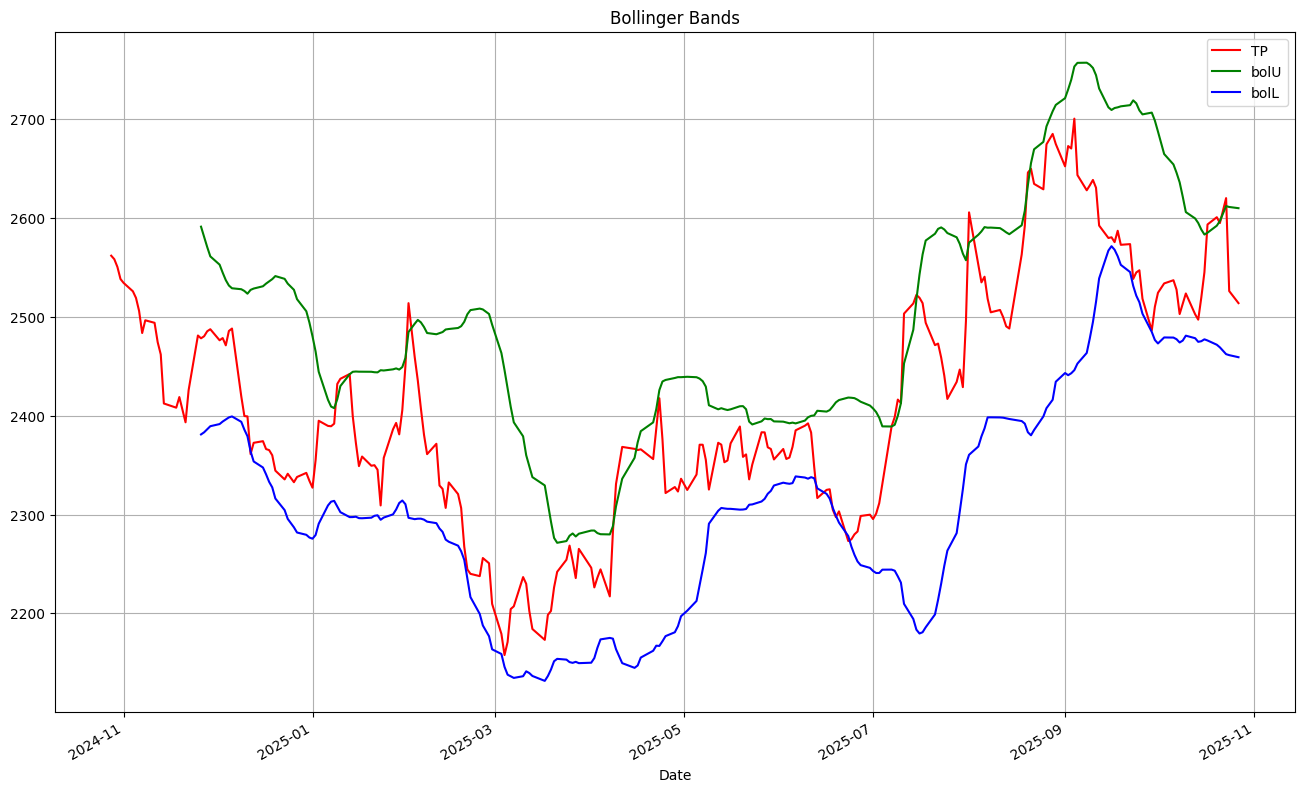

In [34]:
df.plot(y=['TP','bolU','bolL'], figsize = (16,10), color = ['red','green','blue'], grid = True, title = 'Bollinger Bands');

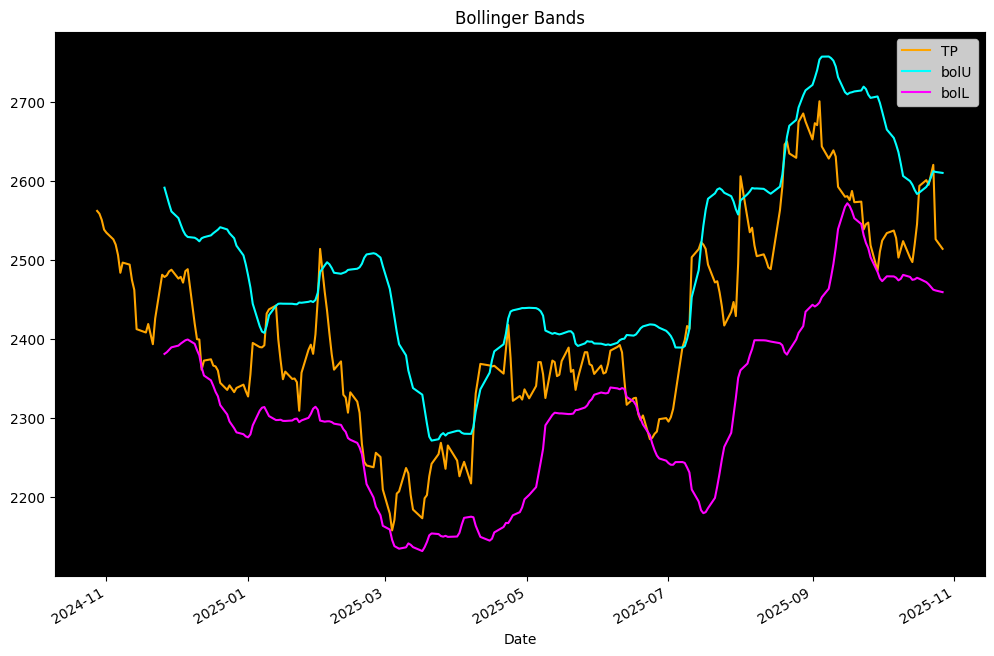

In [35]:
df.plot(y=['TP','bolU','bolL'],\
        figsize = (12,8),\
        color = ['orange','cyan','magenta'],\
        grid = False,\
        title = 'Bollinger Bands').\
        set_facecolor('black');

#Technical Charts

In [36]:
!pip install mplfinance > /dev/null
#
# https://github.com/matplotlib/mplfinance#usage
#
import mplfinance as mpf

In [37]:
df = BSEcsv2df('hulv.csv')
df.head()

,Open,High,Low,Close,No.of Shares,No. of Trades,Turnover
Date,,,,,,,
2024-10-28,2547.95,2589.20,2521.60,2575.25,31665,3009,81125068.0
2024-10-29,2589.95,2589.95,2536.25,2549.20,54929,2822,140133044.0
2024-10-30,2550.00,2562.95,2533.95,2554.95,26861,3934,68592298.0
2024-10-31,2564.55,2564.55,2523.05,2527.50,165308,13866,418376939.0
2024-11-01,2550.05,2550.05,2515.00,2538.35,5788,1216,14683973.0


In [38]:
#df.columns
dropCols = ['Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.rename(columns={'No.of Shares':'Volume'}, inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-28,2547.95,2589.20,2521.60,2575.25,31665
2024-10-29,2589.95,2589.95,2536.25,2549.20,54929
2024-10-30,2550.00,2562.95,2533.95,2554.95,26861


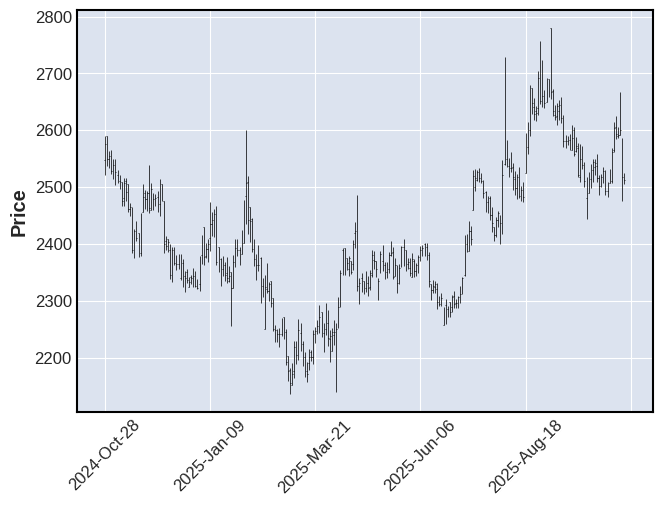

In [39]:
#very basic usage
mpf.plot(df)

In [40]:
#df.loc['2020-01-01':'2020-12-31']

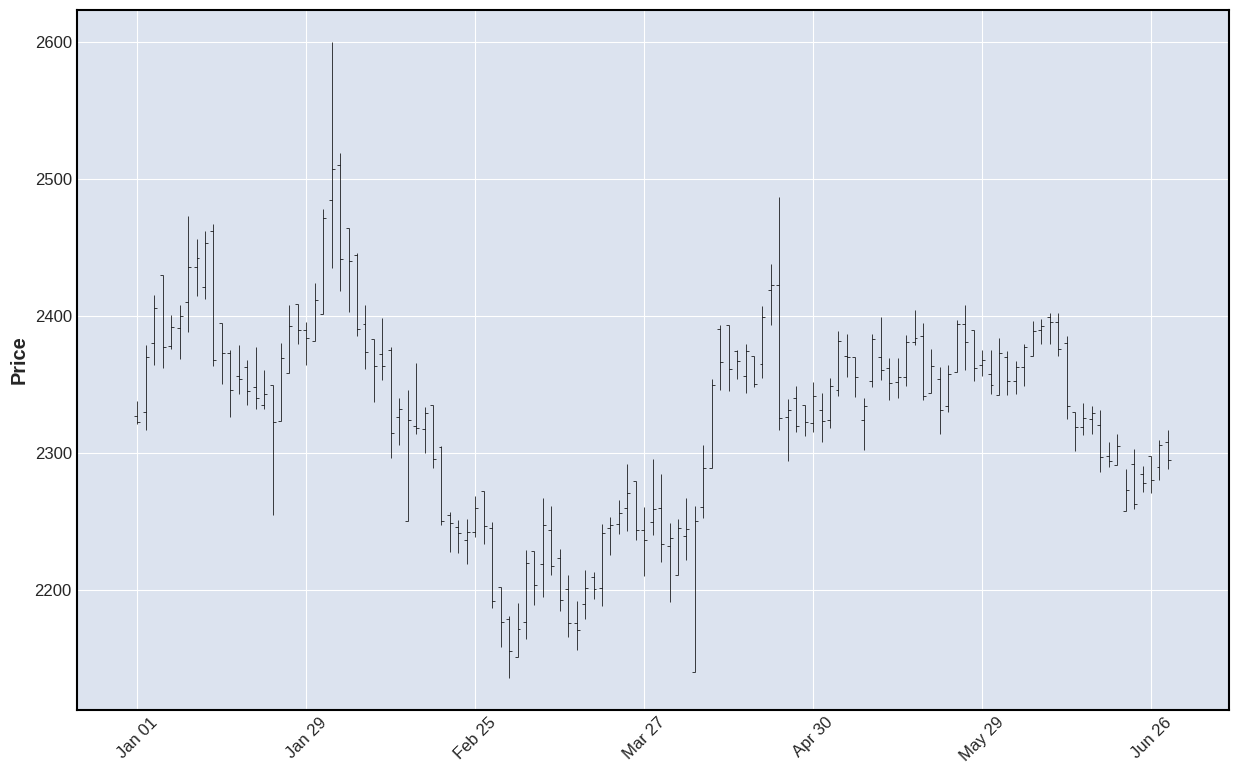

In [41]:
mpf.plot(df.loc['2025-01-01':'2025-06-30'],figsize = (16,10))

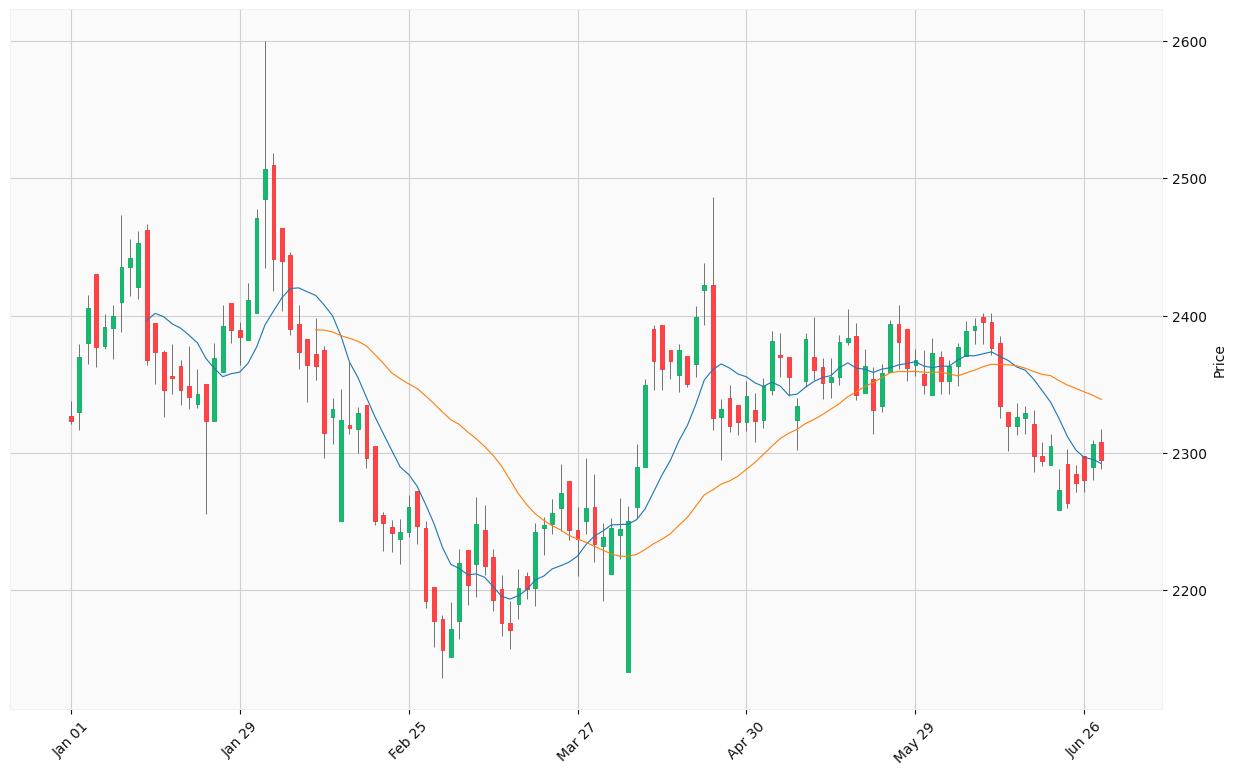

In [42]:
#add moving average and candles
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',mav=(10,30), style='yahoo', figsize = (16,10))

In [43]:
n = 20                              # smoothing period  30
m = 2                               # number of sigmas
df['TP'] = ((df['High']+df['Low']+df['Close'])/3).round(decimals = 2)
df['MAvg'] = df['TP'].rolling(n).mean().round(decimals = 2)
df['MSig'] = df['TP'].rolling(n).std().round(decimals = 2)
df['bolU'] = df['MAvg'] + m * df['MSig']
df['bolL'] = df['MAvg'] - m * df['MSig']
df.sample(5)

,Open,High,Low,Close,Volume,TP,MAvg,MSig,bolU,bolL
Date,,,,,,,,,,
2025-02-04,2464.10,2464.10,2403.0,2439.90,120825,2435.67,2396.42,50.30,2497.02,2295.82
2025-03-11,2243.95,2261.55,2211.0,2217.30,65757,2229.95,2250.71,54.68,2360.07,2141.35
2024-11-14,2463.50,2464.95,2383.3,2389.05,102837,2412.43,NaN,NaN,NaN,NaN
2025-03-10,2218.80,2267.40,2195.0,2247.75,39081,2236.72,2257.79,60.70,2379.19,2136.39
2025-03-05,2151.10,2190.90,2151.0,2171.35,21119,2171.08,2282.84,72.46,2427.76,2137.92


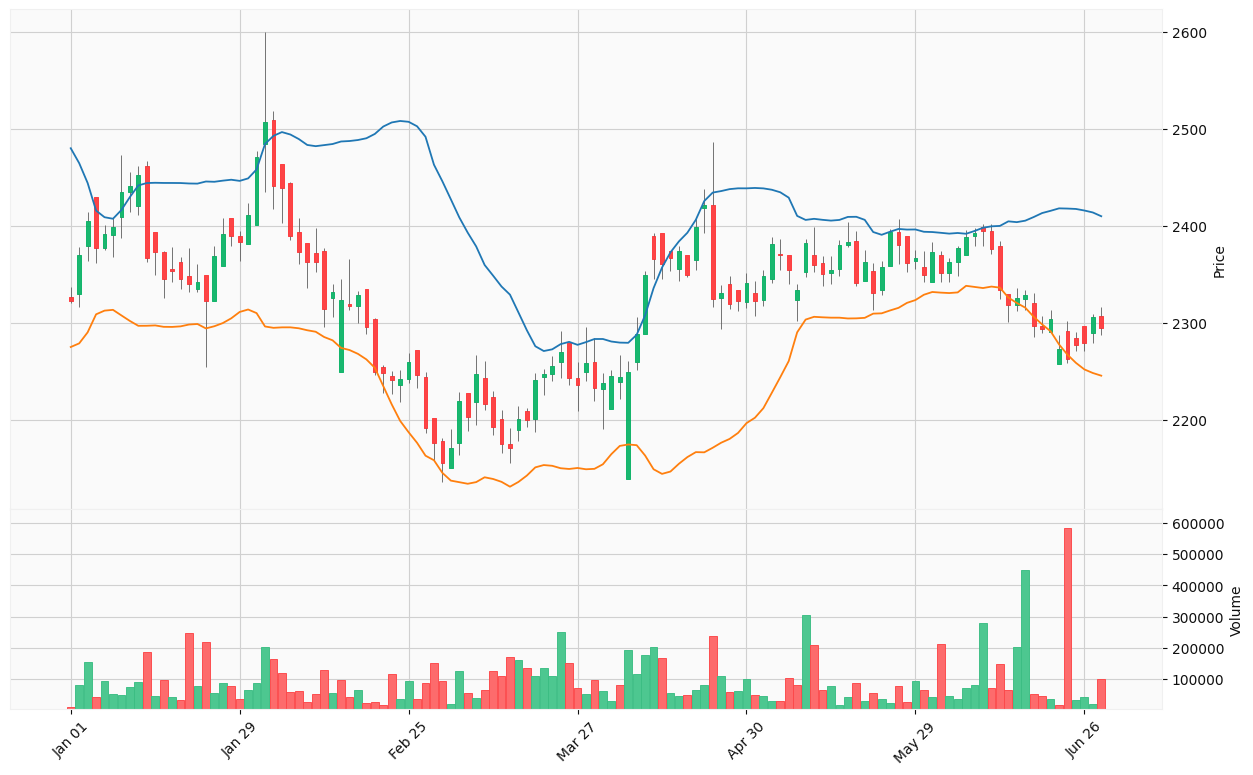

In [44]:
apd = mpf.make_addplot(df.loc['2025-01-01':'2025-06-30'][['bolU', 'bolL']])
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle', addplot=apd, volume=True,style='yahoo', figsize = (16,10))

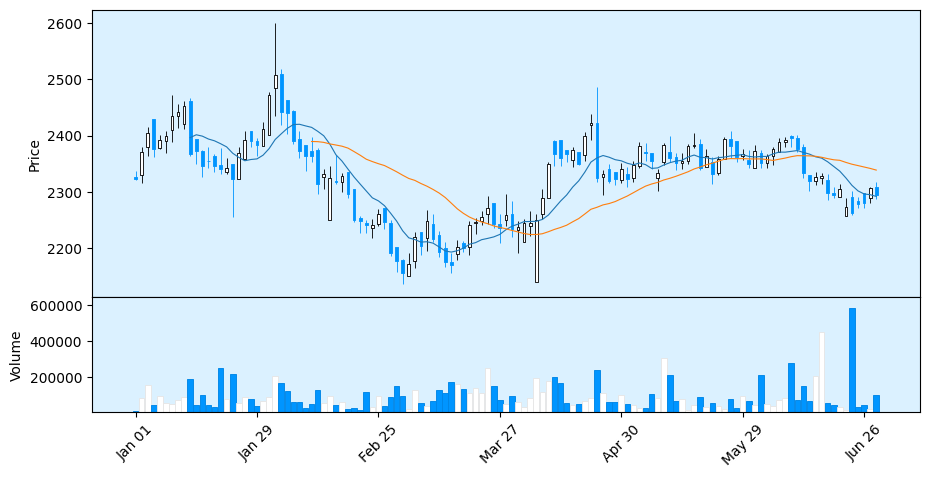

In [45]:
#add volume
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

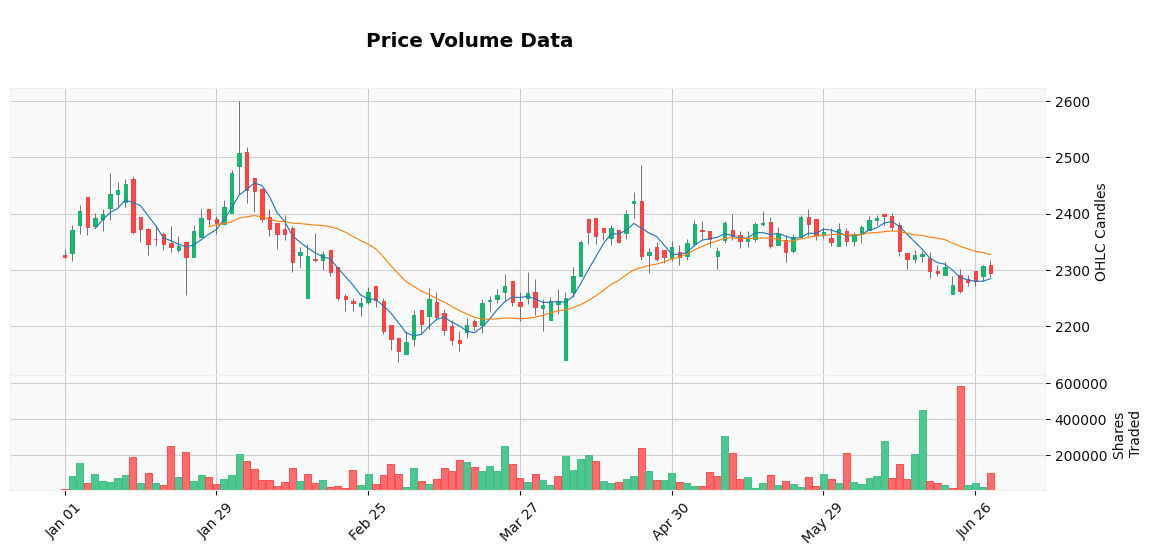

In [46]:
mpf.plot(df.loc['2025-01-01':'2025-06-30'], type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

In [47]:
pd.to_datetime('today').strftime('%d %B %Y')

'19 November 2025'

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#ChronoTYM <br>
In Indic phraseology, tantra is knowledge, a yantra is a device to explore this knowledge and a mantra is the code that unlocks both the tantra and its yantra. Chrono/TYM a sci-fi trilogy that recreates this framework where the first novel Chronotantra defines the contours of a tech driven, futuristic society, the second, Chronoyantra, describes a device used to explore the genesis of this society, while the third, Chronomantra finally reveals the code, the key, that unlocks this puzzle.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdu_ajYwBRzk5iFYlcs59ZoRMMg6rhNm4JERKspvFJoveJsnfwRlzMICiC37UOja_Bd4sbfLA1pyyBbe0mj3tUfDBXoqCzNUDw3Wux7acoJBaLkWjAvJXfa7drRY2GQRAlFxEY9O7a7raY4RKy7cA3Uxgf5QsaZQ99C9GfXxFSex_rke8ROhAn41t8zOqK/s1640/tymBanner01_3.png)